In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
data=pd.DataFrame(pd.read_csv('F:\Projects\Kaggle\Bengaluru_House_Data.csv'))

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
data=data.drop(['area_type','availability','society','balcony'],axis=1)

In [7]:
data.shape

(13320, 5)

In [8]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
data['BHK']=data['size'].apply(lambda x: int(x.split()[0]))

In [12]:
data['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
data=data.drop('size',axis='columns')

In [14]:
def convert_float(x):
    y=x.split('-')
    if len(y)==2:
        return (float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
convert_float('234squa')

In [16]:
data['total_sqft']=data['total_sqft'].apply(convert_float)

In [17]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [18]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']

In [19]:
data['location']=data['location'].apply(lambda x:x.strip())

In [20]:
len(data['location'].unique())

1293

In [21]:
location_stats=data['location'].value_counts().reset_index()

In [22]:
location_stats

,index,location
0,Whitefield,535
1,Sarjapur Road,392
2,Electronic City,304
3,Kanakpura Road,266
4,Thanisandra,236
...,...,...
1288,Air View Colony,1
1289,Kanakapura Rod,1
1290,"Banasawadi,",1
1291,GKW Layout,1


In [23]:
location_stats.sort_values(by='location' ,ascending=False)

,index,location
0,Whitefield,535
1,Sarjapur Road,392
2,Electronic City,304
3,Kanakpura Road,266
4,Thanisandra,236
...,...,...
974,Virgonagar,1
973,Tharabanahalli,1
972,KAMAKIYA,1
971,Mango Garden Layout,1


In [24]:
location_less_than_10=location_stats[location_stats['location']<11]

In [25]:
len(location_less_than_10['index'].unique())

1052

In [26]:
res=location_less_than_10['index']

In [38]:
res=list(res)

In [39]:
def others(x):
    if x in res:
        return 'other'
    else:
        return x

In [40]:
data['location']=data.location.apply(others)

In [41]:
len(data['location'].unique())

242

In [42]:
data['location'].value_counts()

other               2881
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
                    ... 
LB Shastri Nagar      11
Tindlu                11
Nehru Nagar           11
HAL 2nd Stage         11
Marsur                11
Name: location, Length: 242, dtype: int64

In [43]:
data.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [47]:
data=data[~(data['total_sqft']/data['BHK']<300)]

In [49]:
data.shape

(12502, 6)

In [50]:
data.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [55]:
data.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [65]:
def outliers(data):
    data_out=pd.DataFrame()
    for i,j in data.groupby('location'):
        m=np.mean(j['price_per_sqft'])
        sd=np.std(j['price_per_sqft'])
        red=j[(j.price_per_sqft>=(m-sd))&(j.price_per_sqft<=(m+sd))]
        data_out=pd.concat([data_out,red],ignore_index=True)
    return data_out

In [66]:
data=outliers(data)

In [69]:
data.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [73]:
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,1503.877034,2.474075,90.982730,2.572210,5657.702572
std,876.716232,0.981338,86.147549,0.896219,2266.476980
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,49.000000,2.000000,4244.762955
50%,1282.000000,2.000000,67.000000,2.000000,5172.413793
75%,1650.000000,3.000000,100.000000,3.000000,6426.099852
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


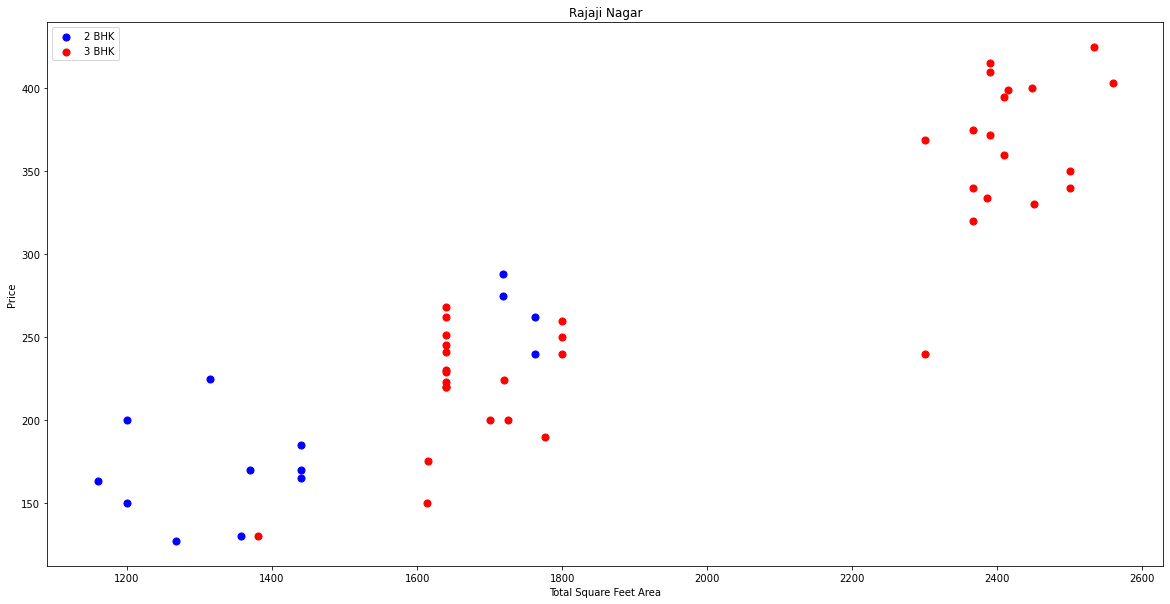

In [76]:
def scatter(data,loc):
    bhk2=data[(data['location']==loc)&(data['BHK']==2)]
    bhk3=data[(data['location']==loc)&(data['BHK']==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(loc)
    plt.legend()
scatter(data,'Rajaji Nagar')

In [82]:
def remove(data):
    exclude=np.array([])
    for loc,loc_df in data.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in loc_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude=np.append(exclude,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude,axis='index')
data=remove(data)
data.shape

(7329, 6)

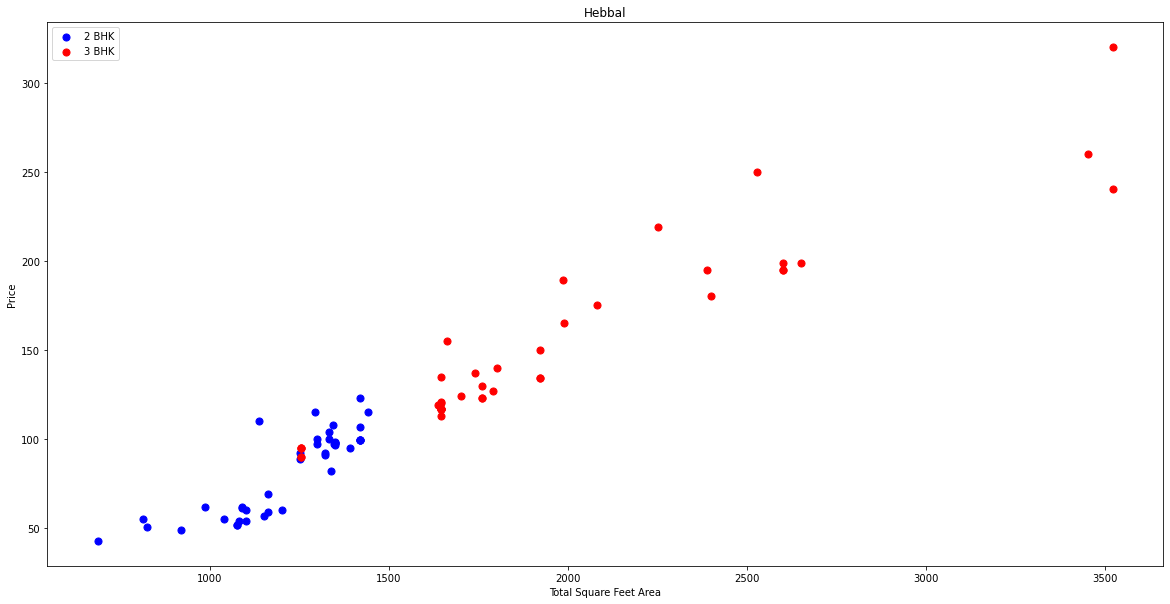

In [84]:
scatter(data,'Hebbal')

In [85]:
data.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

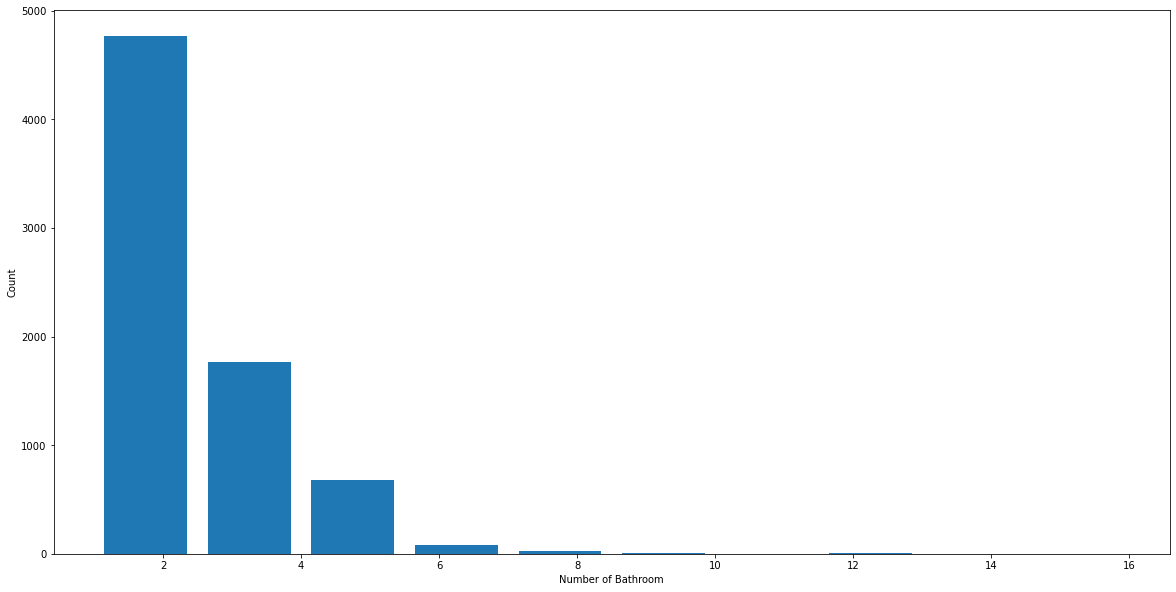

In [87]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel('Number of Bathroom')
plt.ylabel('Count')

In [88]:
data[data.bath>data.BHK+2]

,location,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [89]:
data=data[data.bath<data.BHK+2]

In [90]:
data.shape

(7251, 6)

In [92]:
data=data.drop('price_per_sqft',axis=1)

In [94]:
dummies=pd.get_dummies(data.location)
dummies=dummies.drop('other',axis=1)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
data=data.drop('location',axis=1)

In [98]:
data=pd.concat([data,dummies],axis=1)

In [99]:
data.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X=data.drop('price',axis=1)

In [101]:
y=data.price

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [103]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8452277697874251

In [104]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friendman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name
            ,'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [111]:
find_best_model(X,y)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "F:\Anaconda\lib\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'friendman_mse'

  warnings.warn("Estimator fit failed. The score on this train-test"
F:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\Anaconda\lib\s

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.720472,"{'criterion': 'mse', 'splitter': 'best'}"


In [112]:
def predict(loc,sqft,bath,bhk):
    loc_index=np.where(X.columns==loc)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [122]:
predict('1st Phase JP Nagar',1000,2,2)

83.49904677154886

In [121]:
np.where(X.columns=='1st Phase JP Nagar')

(array([4], dtype=int64),)

In [120]:
X.columns=='1st Phase JP Nagar'

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,